In [1]:
%pip install opencv-python
%pip install pytesseract
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
import pandas as pd

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
os.chdir(r"national_id_detection")

In [6]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

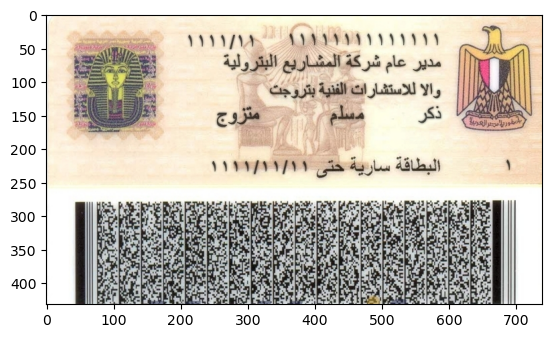

In [3]:
#first we read the image and view the image with original colors
original=cv2.imread('fakeid2.png')
original=cv2.cvtColor(original,cv2.COLOR_BGR2RGB)
plt.imshow(original)


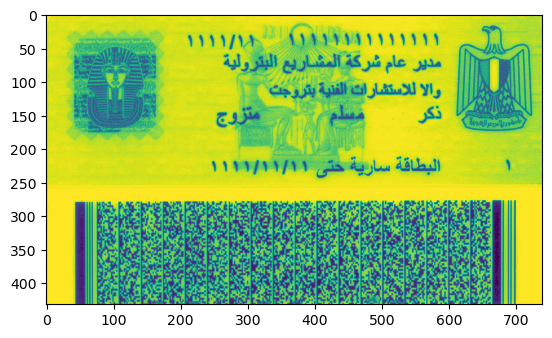

In [4]:
#convert image to gray
img=cv2.imread('fakeid2.png',0)
plt.imshow(img)


In [7]:
#try pytesseract without any preprocessing with color image
print(pytesseract.image_to_string(original, lang='ara'))


    
   
  

1111 111115١
‏مدير عام شركة المشاريع البترولية‎
‏والا للاستشاراك ألفنية بتروجت‎

ذكر ‎١‏ هسام متزوج

   

البطاقة سازينة“ختى ‎11131/3031711١‏



as we can see most of words are wrong

In [8]:
#try pytesseract without any preprocessing with gray image

print(pytesseract.image_to_string(img, lang='ara'))


لل ل ا ل ل ليل
مدير عام شركة المشاريع البترولية
والا للاستشاراك ألفنية بتروجت

ذكر سام متزوج

   

1١1131/3:3/11١ ‏البطاقة سازينة“ختى‎ ١

 



again  most of words are wrong

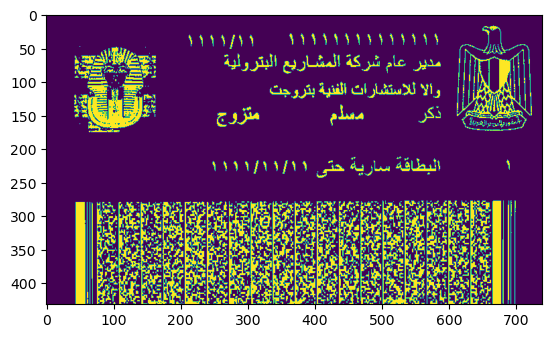

In [9]:
#first we try threshold: inverse binary thresh
ret,th=cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(th)

In [10]:
print(pytesseract.image_to_string(th, lang='ara'))


 

١١11/1١ 11111111111111١

مدير عام شركة المشاريع البترولية ع
والا للاستشارات الفنية بتروجت 0-6
ذكر مسطام متزوج ل 0

2 الل لل

 



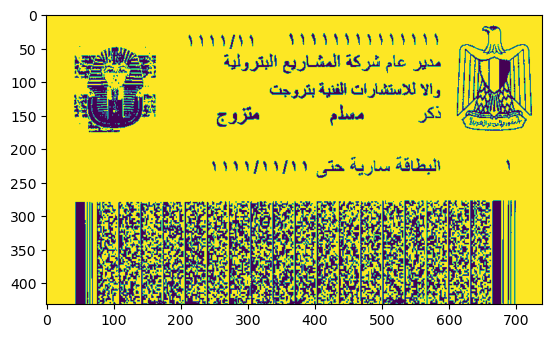

In [11]:
#we try threshold:binary thresh
ret,th2=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
plt.imshow(th2)

In [12]:
print(pytesseract.image_to_string(th2, lang='ara'))


 

د ا ا ا ا له ‎١١11/1١‏

مدير عام شركة المشاريع البترولية ع
والا للاستشارات الفنية بتروجت 0-6
ذكر مسطام متزوج 2 0

البطاقة سارية حتى ‎1١١١1١/1١1١/1١١‏

 



ل لل لل
مدير عام شركة المشاريع البترولية
والا للاستشارات الفنية بتروجت

ذكر ملم متزوج

   

1١1١1١/1١١/1١١ ‏البطاقة سارية حتى‎ ١

 



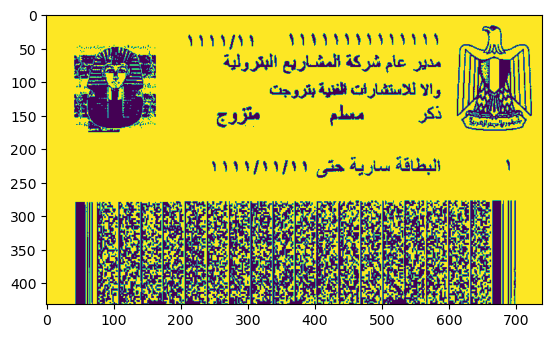

In [13]:
#we try threshold: otsu thresh
ret, thresh= cv2.threshold(img, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  
plt.imshow(thresh)     
print(pytesseract.image_to_string(thresh, lang='ara'))
     

5ؤ111111 اللا
مدير عام شركة المشاريع البقرولية
والا للاستشارات الفنية بتروجت

ذكر ملم متزوج

  
   
  

 

1١1١١1١/١١/1١١ ‏البطاقة سارية حتى‎ ١



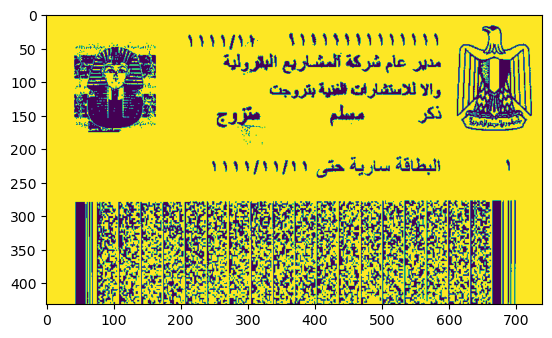

In [14]:
# we try threshold: adaptive  thresh mean
thresh1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 199,49) 
plt.imshow(thresh1)     
print(pytesseract.image_to_string(thresh1, lang='ara'))

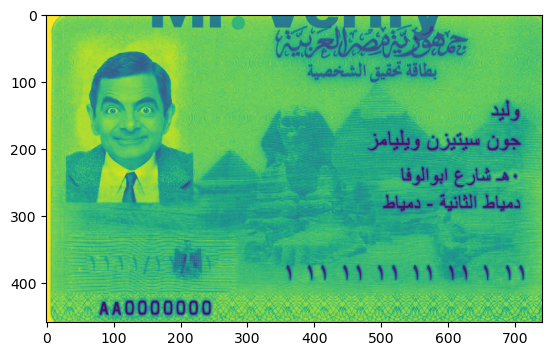

In [15]:
#first we read the image and view the image with original colors
img2=cv2.imread('fakeid1.png',0)
plt.imshow(img2)

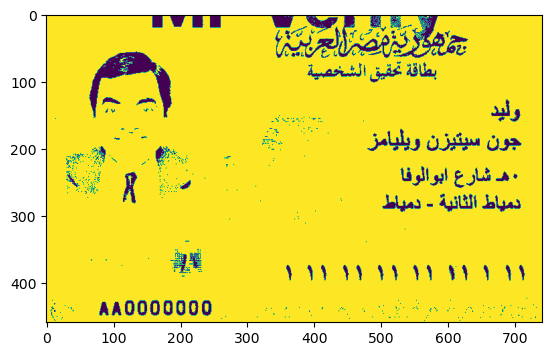

In [16]:
thresh2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 199,45) 
plt.imshow(thresh2)     


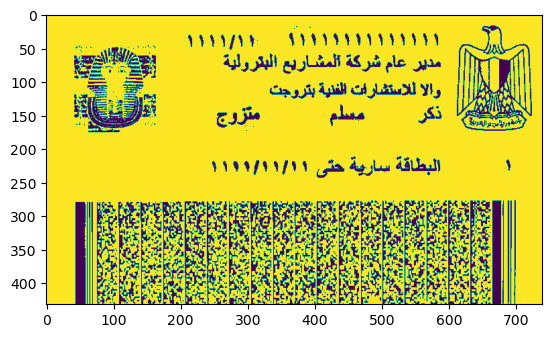

In [17]:
thresh1= cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 199,45) 
plt.imshow(thresh1)  

In [18]:
# we try threshold: adaptive  thresh guassian
text1 = pytesseract.image_to_data(thresh1,lang='ara', output_type='data.frame')
text2= pytesseract.image_to_data(thresh2,lang='ara', output_type='data.frame')
first_name=text2.text[6]
last_name=text2.text[8]+" "+text2.text[9]+" "+text2.text[10]
address=text2.text[12]+" "+text2.text[13]+" "+text2.text[14]
region=text2.text[16]+" "+text2.text[17]
governorate=text2.text[19]
national_id=text2.text[28]
job=text1.text[7]+text1.text[8]+" "+text1.text[9]+" "+text1.text[10]+" "+text1.text[11]+" "+text1.text[13]+" "+text1.text[14]+" "+text1.text[15]+" "+text1.text[16]
gender=text1.text[19]
religion=text1.text[20]
marital_status=text1.text[21]
Validity_date=text1.text[37]

# Create a DataFrame with one column and one row
df = pd.DataFrame({'first_name': [first_name],'last_name': [last_name],'address': [address],'region': [region],'governorate': [governorate],'national_id': [national_id],'job': [job],'gender': [gender],'religion': [religion],'marital_status': [marital_status],'Validity_date': [Validity_date]})
df


,first_name,last_name,address,region,governorate,national_id,job,gender,religion,marital_status,Validity_date
0,وليد,جون سيتيزن ويليامز,١ه‏ شارع ابوالوفا,دمياط الثانية,دمياط,١١1١1111١1١1١1١,مديرعام شركة آلمشاريع البترولية والا للاستشارا...,ذكر,مسلم,متزوج,١١١١/١١/١١


the best result when use:  adaptive  threshold using guassian

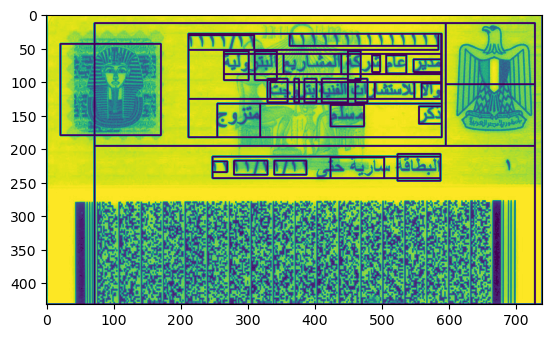

In [19]:
from pytesseract import Output

d = pytesseract.image_to_data(original, output_type=Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(img)


here we try to box around the words and most of words are correctly have been boxed